This program classifies whether a person is having a cardiovascular disease or not

In [ ]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#loading the data
from google.colab import files
uploaded = files.upload()

Saving cardio.csv to cardio.csv


In [ ]:
df = pd.read_csv('cardio.csv')

In [ ]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62,110,80,1,1,0,0,1,0
1,1,20228,1,156,85,140,90,3,1,0,0,1,1
2,2,18857,1,165,64,130,70,3,1,0,0,0,1
3,3,17623,2,169,82,150,100,1,1,0,0,1,1
4,4,17474,1,156,56,100,60,1,1,0,0,0,0


In [ ]:
df.shape

(70000, 13)

In [ ]:
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62,110,80,1,1,0,0,1,0
1,1,20228,1,156,85,140,90,3,1,0,0,1,1
2,2,18857,1,165,64,130,70,3,1,0,0,0,1
3,3,17623,2,169,82,150,100,1,1,0,0,1,1
4,4,17474,1,156,56,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72,135,80,1,2,0,0,0,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   id           70000 non-null  int64
 1   age          70000 non-null  int64
 2   gender       70000 non-null  int64
 3   height       70000 non-null  int64
 4   weight       70000 non-null  int64
 5   ap_hi        70000 non-null  int64
 6   ap_lo        70000 non-null  int64
 7   cholesterol  70000 non-null  int64
 8   gluc         70000 non-null  int64
 9   smoke        70000 non-null  int64
 10  alco         70000 non-null  int64
 11  active       70000 non-null  int64
 12  cardio       70000 non-null  int64
dtypes: int64(13)
memory usage: 6.9 MB


In [ ]:
df.isna().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [ ]:
df.isnull().values.any()

False

In [ ]:
#view some basic stats
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205543,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395829,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df['cardio'].value_counts()

0    35021
1    34979
Name: cardio, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


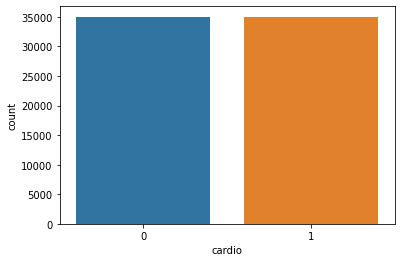

In [ ]:
sns.countplot(df['cardio'])

In [ ]:
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62,110,80,1,1,0,0,1,0
1,1,20228,1,156,85,140,90,3,1,0,0,1,1
2,2,18857,1,165,64,130,70,3,1,0,0,0,1
3,3,17623,2,169,82,150,100,1,1,0,0,1,1
4,4,17474,1,156,56,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72,135,80,1,2,0,0,0,1


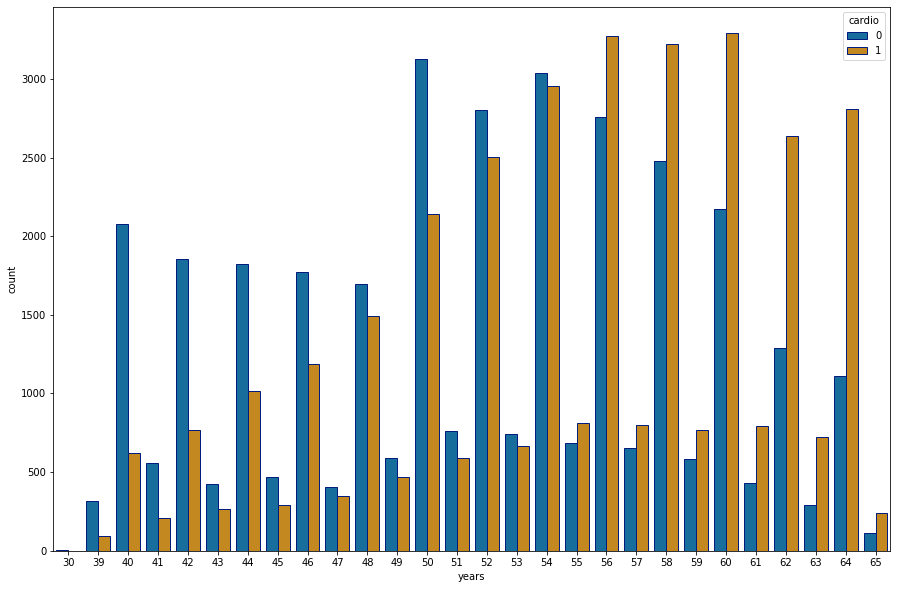

In [ ]:
#we are creating a years column and converting to integer
df['years'] = (df['age']/365).round(0)

df['years'] = pd.to_numeric(df['years'], downcast='integer')

#visualize the data
plt.figure(figsize=(15,10))
sns.countplot(x='years', hue='cardio', data=df, palette = 'colorblind', edgecolor= sns.color_palette('dark', n_colors=1))

In [ ]:
#we can get the correlation of the columns

df.corr()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,years
id,1.000000,0.003457,0.003502,-0.003038,-0.001831,0.003356,-0.002529,0.006106,0.002467,-0.003699,0.001210,0.003755,0.003799,0.003050
age,0.003457,1.000000,-0.022811,-0.081515,0.053682,0.020764,0.017647,0.154424,0.098703,-0.047633,-0.029723,-0.009927,0.238159,0.999090
gender,0.003502,-0.022811,1.000000,0.499033,0.155412,0.006005,0.015254,-0.035821,-0.020491,0.338135,0.170966,0.005866,0.008109,-0.023017
height,-0.003038,-0.081515,0.499033,1.000000,0.290966,0.005488,0.006150,-0.050226,-0.018595,0.187989,0.094419,-0.006570,-0.010821,-0.081456
weight,-0.001831,0.053682,0.155412,0.290966,1.000000,0.030702,0.043711,0.141763,0.106859,0.067779,0.067115,-0.016865,0.181656,0.053659
ap_hi,0.003356,0.020764,0.006005,0.005488,0.030702,1.000000,0.016086,0.023778,0.011841,-0.000922,0.001408,-0.000033,0.054475,0.020793
ap_lo,-0.002529,0.017647,0.015254,0.006150,0.043711,0.016086,1.000000,0.024019,0.010806,0.005186,0.010601,0.004780,0.065719,0.017754
cholesterol,0.006106,0.154424,-0.035821,-0.050226,0.141763,0.023778,0.024019,1.000000,0.451578,0.010354,0.035760,0.009911,0.221147,0.154386
gluc,0.002467,0.098703,-0.020491,-0.018595,0.106859,0.011841,0.010806,0.451578,1.000000,-0.004756,0.011246,-0.006770,0.089307,0.098596
smoke,-0.003699,-0.047633,0.338135,0.187989,0.067779,-0.000922,0.005186,0.010354,-0.004756,1.000000,0.340094,0.025858,-0.015486,-0.047884


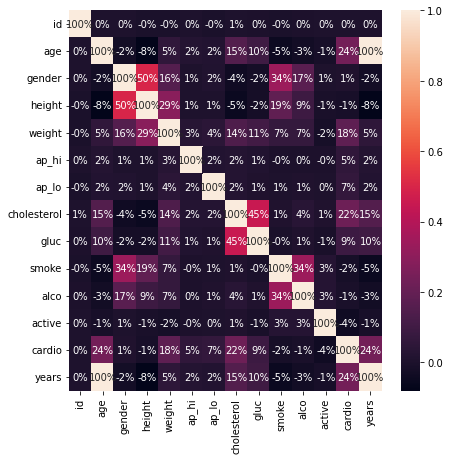

In [ ]:
#visualize the data
plt.figure(figsize=(7,7))
sns.heatmap(df.corr(), annot = True, fmt = '.0%')

In [ ]:
df


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,years
0,0,18393,2,168,62,110,80,1,1,0,0,1,0,50
1,1,20228,1,156,85,140,90,3,1,0,0,1,1,55
2,2,18857,1,165,64,130,70,3,1,0,0,0,1,52
3,3,17623,2,169,82,150,100,1,1,0,0,1,1,48
4,4,17474,1,156,56,100,60,1,1,0,0,0,0,48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76,120,80,1,1,1,0,1,0,53
69996,99995,22601,1,158,126,140,90,2,2,0,0,1,1,62
69997,99996,19066,2,183,105,180,90,3,1,0,1,0,1,52
69998,99998,22431,1,163,72,135,80,1,2,0,0,0,1,61


In [ ]:
#PREPARING THE ML MODEL

#drop the years col
df = df.drop('years', axis = 1)
#drop the id column
df = df.drop('id', axis = 1)
df

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,2,168,62,110,80,1,1,0,0,1,0
1,20228,1,156,85,140,90,3,1,0,0,1,1
2,18857,1,165,64,130,70,3,1,0,0,0,1
3,17623,2,169,82,150,100,1,1,0,0,1,1
4,17474,1,156,56,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
69995,19240,2,168,76,120,80,1,1,1,0,1,0
69996,22601,1,158,126,140,90,2,2,0,0,1,1
69997,19066,2,183,105,180,90,3,1,0,1,0,1
69998,22431,1,163,72,135,80,1,2,0,0,0,1


In [ ]:
#split the data into feature data and target data
X = df.iloc[:, :-1].values  # we are accepting all of the rows and all the cols except the last column
Y = df.iloc[:, -1].values   # we are accepting all of the rows and the last col of the target col

In [ ]:
# split the data again : into 75% training and 25% testing dataset
# changing to : 20 % testing and 80% training
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 1)


In [ ]:
#feature scaling
#scale the values in the data to be values between 0 and 1 (inclusive)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
# use the Random Forest classifier model

from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 1)

#fit the algo
forest.fit(X_train, Y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=1)

In [ ]:
#checking the accuracy
model = forest

model.score(X_train, Y_train)

0.9792142857142857

In [ ]:
#test the model accuracy on the test data
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(Y_test, model.predict(X_test))

TN = cm[0][0]  # True Negative  (res is correct that person is not diabetic(negative))
TP = cm[1][1]  #True Positive   (res correct, that the person is diabetic)
FN = cm[1][0]  #False Negative  (model galat bata raha hai, )
FP = cm[0][1]  #False Positive  (model galat bata raha hai)


In [ ]:
#print the confusion matrix
print(cm)

'''
00  01
10  11
'''

[[5206 1711]
 [2461 4622]]


In [ ]:
#calculating the accuracy

accuracy = ((TP + TN)/(TP + TN + FP + FN))
print(f"Model's Accuracy is: {accuracy * 100}%")

Model's Accuracy is: 70.19999999999999%
